# Laboratorio 1: Regresión en Boston

En este laboratorio deben hacer experimentos de regresión con el conjunto de datos "Boston house prices dataset".

Estudiarán el dataset, harán visualizaciones y seleccionarán atributos relevantes a mano.

Luego, entrenarán y evaluarán diferentes tipos de regresiones, buscando las configuraciones que mejores resultados den.

In [46]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Carga del Conjunto de Datos

Cargamos el conjunto de datos y vemos su contenido.

In [2]:
from sklearn.datasets import load_boston
boston = load_boston()
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

### Nombre Columnas:

- CRIM: tasa de crimen.
- ZN: proporción de terreno residencial dividido en zonas para lotes de más de 25,000 pies cuadrados.
- INDUS: proporcion de industrias (comercios no retails) en la ciudad.
- CHAS: Encodig de cegórica (limita con el rio = 1).
- NOX: concentración de oxidos nitricos.
- RM: promedio de habitaciones por viviendas.
- AGE: proporcion de unidades por dueños construidas antes del 1940.
- DIS: distancias ponderadas a cinco centros de empleo de Boston
- RAD: índice de accesibilidad a carreteras radiales
- TAX: Tasa de impuesto a la propiedad de valor total por usd 10,000
- PTRATIO: Proporción alumno-maestro por ciudad  
- B: 1000 (Bk - 0.63) ^ 2 donde Bk es la proporción de negros por ciudad        
- LSTAT: porcentaje menor "estado" de la población
- MEDV: Valor medio de las viviendas ocupadas por sus propietarios en usd 1000

In [42]:
print(boston['DESCR'])   # descripción del dataset
#boston['data']           # matriz con los datos de entrada (atributos)
#boston['target']         # vector de valores a predecir
#boston['feature_names']  # nombres de los atributos para cada columna de 'data'

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [43]:
boston['data'].shape, boston['target'].shape

((506, 13), (506,))

## División en Entrenamiento y Evaluación

Dividimos aleatoriamente los datos en 80% para entrenamiento y 20% para evaluación:

In [44]:
from sklearn.model_selection import train_test_split
X, y = boston['data'], boston['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=0)
X_train.shape, X_test.shape

((404, 13), (102, 13))

## Ejercicio 1: Descripción de los Datos y la Tarea

Responda las siguientes preguntas:

1. ¿De qué se trata el conjunto de datos?
2. ¿Cuál es la variable objetivo que hay que predecir? ¿Qué significado tiene?
3. ¿Qué información (atributos) hay disponibles para hacer la predicción?
4. ¿Qué atributos imagina ud. que serán los más determinantes para la predicción?
5. ¿Qué problemas observa a priori en el conjunto de datos? ¿Observa posibles sesgos, riesgos, dilemas éticos, etc? Piense que los datos pueden ser utilizados para hacer predicciones futuras.

**No hace falta escribir código para responder estas preguntas.**

## Ejercicio 2: Visualización de los Datos

1. Para cada atributo de entrada, haga una gráfica que muestre su relación con la variable objetivo.
2. Estudie las gráficas, identificando **a ojo** los atributos que a su criterio sean los más informativos para la predicción.
3. Para ud., ¿cuáles son esos atributos? Lístelos en orden de importancia.

In [73]:
X.shape, y.shape

((506, 13), (506,))

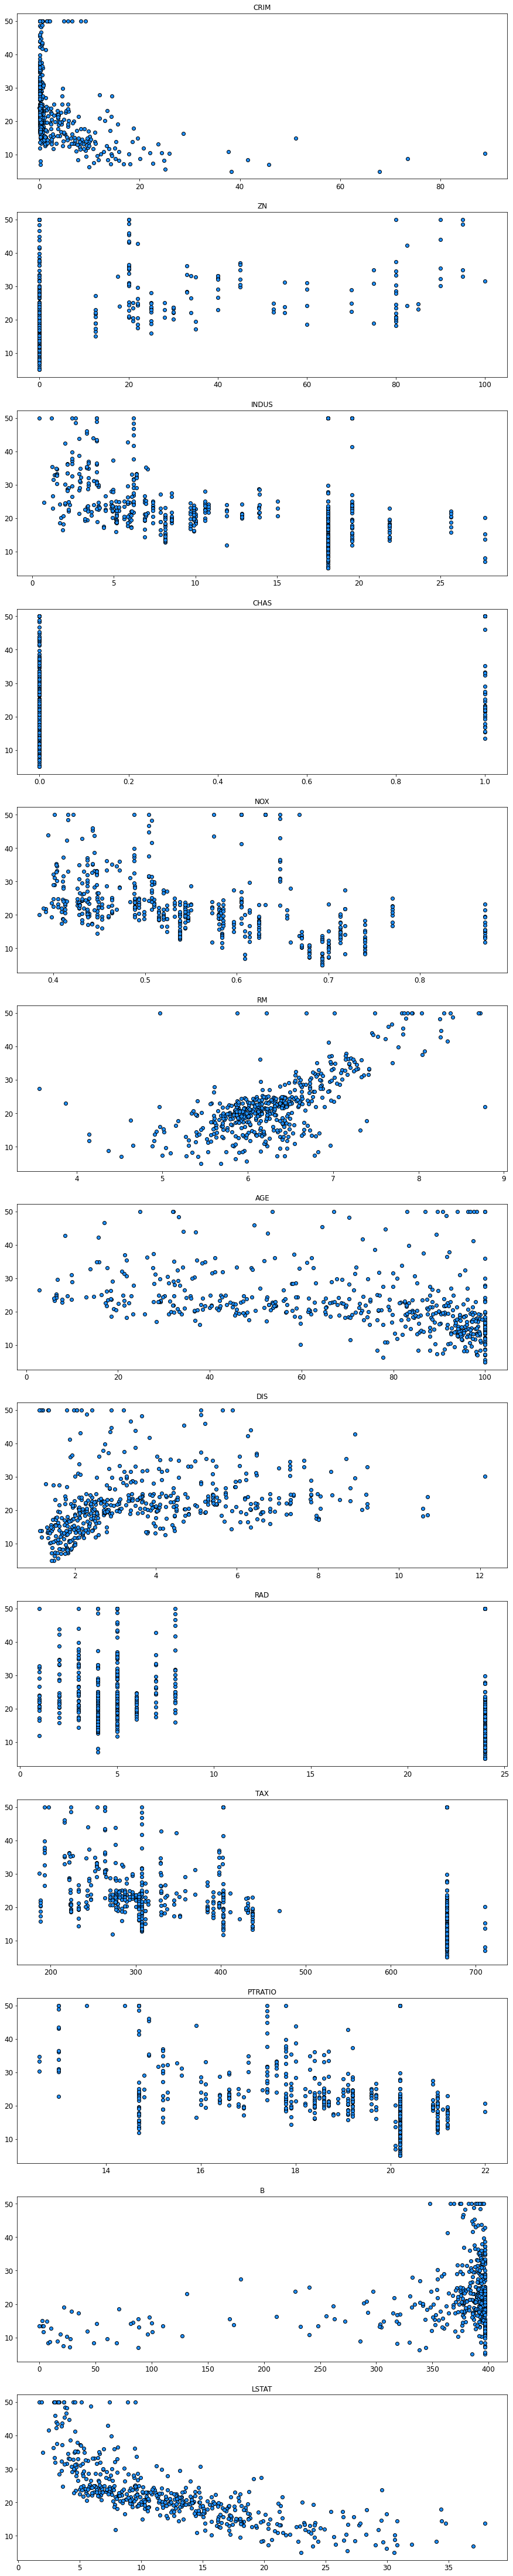

In [68]:
# 1. Resolver acá. Ayuda/ejemplo:
fig, axes = plt.subplots(13,figsize=(15, 80))

for ax, feature in zip(axes,boston['feature_names']):
    selector = (boston['feature_names'] == feature)
    ax.scatter(X[:, selector], y, facecolor="dodgerblue", edgecolor="k", label="datos")
    ax.set_title(feature)
    #ax.show()
    ax.tick_params(labelsize=12)

#feature ='CRIM'
#selector = (boston['feature_names'] == feature)
#plt.scatter(X[:, selector], y, facecolor="dodgerblue", edgecolor="k", label="datos")
#plt.title(feature)
#plt.show()

CRIM
Se observa que los valores analizados en este dataset se encuentran concentrados en zonas de bajo crimen, es decir tenemos baja frecuencia de casas en lugares con alta delincuencias. Sin embargo, vemos que en los lugares donde la delincuencia es baja los precios también son bajos. 

ZN
Si bien, observamos que en valores bajos de pies cuadrados los precios son variados. No hay precios bajos para casas con mas de 15 pies cuadrados aproxidamente. 

INDUS
Se observa que las viviendas con precios más altos se encuentran en lugares poco industriales, por el contrario en las zonas mas industriales hay mayor concentración de casas con precios bajos.

CHAS
En primer lugar, observamos que en este dataset tenemos mayor concentración de casas en zonas lejanas al rio xx. Sin embargo, en el grupo de casas cercanos el rio el rango de precios arranca arriba de los 15 miles.

NOX
La mayor concentración de casos se encuentra a niveles bajos de oxido nitrógeno. No se observa una relación concluyente. Se podría realizar un análisis conjunto con la variable INDUS. 

RM
Observamos una fuerte relación positivo entre el número de habitaciones y el precio de la vivienda. 

AGE
Podemos observar que los valores más bajos de viviendas corresponden a las propiedades mas antiguas. 

DIS
Podemos observar que los valores más bajos de viviendas corresponden a las propiedades más cercanos a los conglomerados laborales. 

RAD
A simple viste no se observa un patrón concluyente. 

TAX
Se observa una concentración de casas en lugares donde el costo de los servicios públicos es más barato.

PTRATIO
A simple viste no se observa un patrón concluyente. 

B
La mayoría de las casas de este dataset están en regiones donde el índice B es alto. Y también vemos que los precios son mas altos en esta zona. 

LSTAT
Se observa una relación negativa entre los sectores en donde residen las personas con baja educación y los precios de las casas. Es decir a mayor porcentaje de status bajo social los precios son mas bajos. 

## Ejercicio 3: Regresión Lineal

1. Seleccione **un solo atributo** que considere puede ser el más apropiado.
2. Instancie una regresión lineal de **scikit-learn**, y entrénela usando sólo el atributo seleccionado.
3. Evalúe, calculando error cuadrático medio para los conjuntos de entrenamiento y evaluación.
4. Grafique el modelo resultante, junto con los puntos de entrenamiento y evaluación.
5. Interprete el resultado, haciendo algún comentario sobre las cualidades del modelo obtenido.

**Observación:** Con algunos atributos se puede obtener un error en test menor a 50.

In [74]:
# 1. Resolver acá. Ayuda:
feature = 'RM'  # selecciono el atributo 'CRIM'
selector = (boston['feature_names'] == feature)
X_train_f = X_train[:, selector]
X_test_f = X_test[:, selector]
X_train_f.shape, X_test_f.shape

((404, 1), (102, 1))

In [8]:
# 2. Instanciar y entrenar acá.

In [9]:
# 3. Predecir y evaluar acá.

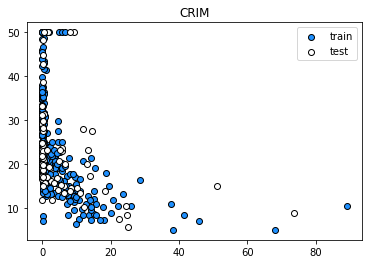

In [10]:
# 4. Graficar acá. Ayuda:
x_start = min(np.min(X_train_f), np.min(X_test_f))
x_end = max(np.max(X_train_f), np.max(X_test_f))
x = np.linspace(x_start, x_end, 200).reshape(-1, 1)
# plt.plot(x, model.predict(x), color="tomato", label="modelo")

plt.scatter(X_train_f, y_train, facecolor="dodgerblue", edgecolor="k", label="train")
plt.scatter(X_test_f, y_test, facecolor="white", edgecolor="k", label="test")
plt.title(feature)
plt.legend()
plt.show()

## Ejercicio 4: Regresión Polinomial

En este ejercicio deben entrenar regresiones polinomiales de diferente complejidad, siempre usando **scikit-learn**.

Deben usar **el mismo atributo** seleccionado para el ejercicio anterior.

1. Para varios grados de polinomio, haga lo siguiente:
    1. Instancie y entrene una regresión polinomial.
    2. Prediga y calcule error en entrenamiento y evaluación. Imprima los valores.
    3. Guarde los errores en una lista.
2. Grafique las curvas de error en términos del grado del polinomio.
3. Interprete la curva, identificando el punto en que comienza a haber sobreajuste, si lo hay.
4. Seleccione el modelo que mejor funcione, y grafique el modelo conjuntamente con los puntos.
5. Interprete el resultado, haciendo algún comentario sobre las cualidades del modelo obtenido.

**Observación:** Con algunos atributos se pueden obtener errores en test menores a 40 e incluso a 35.

In [11]:
# 1. Resolver acá.

In [12]:
# 2. Graficar curvas de error acá.

In [13]:
# 4. Reconstruir mejor modelo acá y graficar.

## Ejercicio 5: Regresión con más de un Atributo

En este ejercicio deben entrenar regresiones que toman más de un atributo de entrada.

1. Seleccione **dos o tres atributos** entre los más relevantes encontrados en el ejercicio 2.
2. Repita el ejercicio anterior, pero usando los atributos seleccionados. No hace falta graficar el modelo final.
3. Interprete el resultado y compare con los ejercicios anteriores. ¿Se obtuvieron mejores modelos? ¿Porqué?

In [14]:
# 1. Resolver acá. Ayuda (con dos atributos):
selector = (boston['feature_names'] == 'CRIM') | (boston['feature_names'] == 'ZN')
X_train_fs = X_train[:, selector]
X_test_fs = X_test[:, selector]
X_train_fs.shape, X_test_fs.shape

((404, 2), (102, 2))

In [15]:
# 2. Resolver acá.

## Más ejercicios (opcionales)

### Ejercicio 6: A Todo Feature

Entrene y evalúe regresiones pero utilizando todos los atributos de entrada (va a andar mucho más lento). Estudie los resultados.

### Ejercicio 7: Regularización

Entrene y evalúe regresiones con regularización "ridge". Deberá probar distintos valores de "alpha" (fuerza de la regularización). ¿Mejoran los resultados?
